In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [0]:
# scaling
X_train , x_test = X_train/255.0 , X_test/255.0

In [0]:
#model
model = Sequential([ Flatten(input_shape = [28,28]),
                    Dense(120 , activation='tanh'),
                    Dense(60 , activation='relu'),
                    Dense(30 , activation='tanh'),
                    Dense(10 , activation='softmax')
                    ])

In [54]:
#to check the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               94200     
_________________________________________________________________
dense_5 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
Total params: 103,600
Trainable params: 103,600
Non-trainable params: 0
_________________________________________________________________


In [0]:
# to check weights
weights= model.layers[1].get_weights()

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [57]:
models = model.fit(X_train , y_train , epochs=50 , batch_size=32 , validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 78us/sample - loss: 0.2886 - acc: 0.9193 - val_loss: 0.1682 - val_acc: 0.9494
Epoch 2/50
48000/48000 [==============================] - 4s 78us/sample - loss: 0.1275 - acc: 0.9606 - val_loss: 0.1175 - val_acc: 0.9635
Epoch 3/50
48000/48000 [==============================] - 4s 77us/sample - loss: 0.0909 - acc: 0.9723 - val_loss: 0.1243 - val_acc: 0.9614
Epoch 4/50
48000/48000 [==============================] - 4s 77us/sample - loss: 0.0697 - acc: 0.9784 - val_loss: 0.1099 - val_acc: 0.9674
Epoch 5/50
48000/48000 [==============================] - 4s 77us/sample - loss: 0.0530 - acc: 0.9842 - val_loss: 0.1030 - val_acc: 0.9685
Epoch 6/50
48000/48000 [==============================] - 4s 77us/sample - loss: 0.0456 - acc: 0.9856 - val_loss: 0.1045 - val_acc: 0.9702
Epoch 7/50
48000/48000 [==============================] - 4s 77us/sample - loss: 0.0354 - acc: 0.9887 - val_loss: 0.

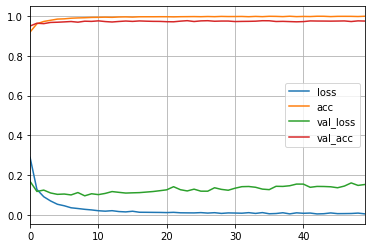

In [58]:
pd.DataFrame(models.history).plot()
plt.grid()

In [59]:
model.evaluate(X_test , y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.1973 - acc: 0.9676


[0.19727698720350964, 0.9676]

In [0]:
y_pred = model.predict_classes(X_test)

In [62]:
classes = [0,1,2,3,4,5,6,7,8,9]
for i in range(10):
  print(y_pred[i] ," ", y_test[i])

7   7
2   2
1   1
0   0
4   4
1   1
4   4
9   9
4   5
9   9
